In [1]:
import pandas as pd
import pyarrow.parquet as pq
import os
import tqdm
import numpy as np
from typing import List
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# TRAIN_DATA_PATH = "/trinity/home/team08/workspace/data/train_data/"
# TEST_DATA_PATH = "/trinity/home/team08/workspace/data/test_data/"

# TRAIN_TARGET_PATH = "/trinity/home/team08/workspace/data/train_target.csv"
# TEST_TARGET_PATH = "/trinity/home/team08/workspace/data/test_target.csv"



TRAIN_DATA_PATH = "/trinity/home/team08/workspace/main_project/train_data/"
TEST_DATA_PATH = "/trinity/home/team08/workspace/main_project/test_data/"

TRAIN_TARGET_PATH = "/trinity/home/team08/workspace/data/train_target.csv"
TEST_TARGET_PATH = "/trinity/home/team08/workspace/data/test_target.csv"

In [3]:
train_target = pd.read_csv(TRAIN_TARGET_PATH)
train_target = train_target.iloc[:20832]
train_target

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
20827,20827,0
20828,20828,0
20829,20829,0
20830,20830,0


In [4]:
train_target[data_frame['id']]

NameError: name 'data_frame' is not defined

In [ ]:
# Загрузка Parquet файла
file_path = '/trinity/home/team08/workspace/data/train_data/train_data_0.pq'
df = pd.read_parquet(file_path)

# Группировка данных по пользователю
user_groups = df.groupby('id')

# Создание списка групп
grouped_data = [group for _, group in user_groups]

# Определение размера каждой части
total_groups = len(grouped_data)
part_size = total_groups // 12

# Разделение на 12 частей, избегая разбиения истории одного пользователя
parts = []
for i in range(12):
    start_index = i * part_size
    end_index = (i + 1) * part_size if i < 11 else total_groups
    part = pd.concat(grouped_data[start_index:end_index])
    parts.append(part)

output_dir = '/trinity/home/team08/workspace/main_project/train_data'
os.makedirs(output_dir, exist_ok = True)

# Сохранение каждой части в отдельный Parquet файл
for i, part in enumerate(parts):
    part_file_path = os.path.join(output_dir, f'part_{i+1}.pqt')
    part.to_parquet(part_file_path)

print("Разделение завершено. Файлы сохранены.")

In [5]:
# Загрузка Parquet файла
file_path = '/trinity/home/team08/workspace/data/test_data/test_data_0.pq'
df = pd.read_parquet(file_path)

# Группировка данных по пользователю
user_groups = df.groupby('id')

# Создание списка групп
grouped_data = [group for _, group in user_groups]

# Определение размера каждой части
total_groups = len(grouped_data)
part_size = total_groups // 2

# Разделение на 2 части, избегая разбиения истории одного пользователя
parts = []
for i in range(2):
    start_index = i * part_size
    end_index = (i + 1) * part_size if i < 1 else total_groups
    part = pd.concat(grouped_data[start_index:end_index])
    parts.append(part)

output_dir = '/trinity/home/team08/workspace/main_project/test_data'
os.makedirs(output_dir, exist_ok = True)

# Сохранение каждой части в отдельный Parquet файл
for i, part in enumerate(parts):
    part_file_path = os.path.join(output_dir, f'part_{i+1}.pqt')
    part.to_parquet(part_file_path)

print("Разделение завершено. Файлы сохранены.")

Разделение завершено. Файлы сохранены.


In [6]:
import os
import pandas as pd
import tqdm
from typing import List


def read_parquet_dataset_from_local(path_to_dataset: str, start_from: int = 0, num_parts_to_read: int = 2,
                                    columns: List[str] = None, verbose: bool = False) -> pd.DataFrame:
    """
    Читает ``num_parts_to_read`` партиций и преобразует их к pandas.DataFrame.

    Параметры:
    -----------
    path_to_dataset: str
        Путь до директории с партициями.
    start_from: int, default=0
        Номер партиции, с которой начать чтение.
    num_parts_to_read: int, default=2
        Число партиций, которые требуется прочитать.
    columns: List[str], default=None
        Список колонок, которые нужно прочитать из каждой партиции. Если None, то считываются все колонки.

    Возвращаемое значение:
    ----------------------
    frame: pandas.DataFrame
        Прочитанные партиции, преобразованные к pandas.DataFrame.
    """

    res = []
    start_from = max(0, start_from)
    # dictionory of format {partition number: partition filename}
    dataset_paths = {int(os.path.splitext(filename)[0].split("_")[-1]): os.path.join(path_to_dataset, filename)
                     for filename in os.listdir(path_to_dataset)}


    chunks = [dataset_paths[num] for num in sorted(dataset_paths.keys()) if num>=start_from][:num_parts_to_read]

    if verbose:
        print("Reading chunks:", *chunks, sep="\n")
    for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):
        chunk = pd.read_parquet(chunk_path, columns=columns)
        res.append(chunk)
    return pd.concat(res).reset_index(drop=True)


In [7]:
data_frame = read_parquet_dataset_from_local(TRAIN_DATA_PATH, start_from=0, num_parts_to_read=1)

/tmp/ipykernel_2412745/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data_frame.head(15)

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0
5,0,6,5,0,11,8,12,11,4,2,...,3,3,3,4,1,2,3,1,0,1
6,0,7,3,9,1,2,12,14,15,5,...,3,3,3,4,1,3,4,1,0,0
7,0,8,2,9,2,3,12,14,15,5,...,3,3,3,4,1,3,4,1,0,0
8,0,9,1,9,11,13,14,8,2,5,...,3,3,3,4,1,2,4,1,0,0
9,0,10,7,9,2,10,8,8,16,4,...,3,3,3,4,1,2,4,1,0,0


In [14]:
data_frame['id'].max()

20832

In [15]:
from typing import Dict
import numpy as np
import pandas as pd
import pickle

def pad_sequence(array: np.ndarray, max_len: int) -> np.ndarray:
    """
    Принимает на вход массив массивов ``array`` и производит padding каждого вложенного массива до ``max_len``.

    Параметры:
    -----------
    array: numpy.ndarray
        Входной массив массивов.
    max_len: int
        Длина, до которой нужно сделать padding вложенных массивов.

    Возвращаемое значение:
    ----------------------
    output: numpy.ndarray
        Выходной массив.
    """
    if isinstance(max_len, float):
        print(max_len)
    output = np.zeros((len(features), max_len))
    output[:, :array.shape[1]] = array
    return output


def truncate(x, num_last_credits: int = 0):
    return pd.Series({"sequences": x.values.transpose()[:, -num_last_credits:]})


def transform_credits_to_sequences(credits_frame: pd.DataFrame,
                                   num_last_credits: int = 0) -> pd.DataFrame:
    """
    Принимает pandas.DataFrame с записями кредитных историй клиентов, сортирует кредиты по клиентам
    (внутри клиента сортирует кредиты от старых к новым), берет ``num_last_credits`` кредитов,
    возвращает новый pandas.DataFrame с двумя колонками: id и sequences.
    Каждое значение в столбце sequences - это массив массивов.
    Каждый вложенный массив - значение одного признака во всех кредитах клиента.
    Всего признаков len(features), поэтому будет len(features) массивов.

    Параметры:
    -----------
    credits_frame: pandas.DataFrame
        Датафрейм с записями кредитных историй клиентов.
    num_last_credits: int, default=0
         Количество кредитов клиента, которые будут включены в выходные данные. Если 0, то берутся все кредиты.

    Возвращаемое значение:
    ----------------------
    output: pandas.DataFrame
        Выходной датафрейм с двумя столбцами: "id", "sequences".
    """
    return credits_frame \
        .sort_values(["id", "rn"]) \
        .groupby(["id"])[features] \
        .apply(lambda x: truncate(x, num_last_credits=num_last_credits)) \
        .reset_index()


def create_padded_buckets(frame_of_sequences: pd.DataFrame, bucket_info: Dict[int, int],
                          save_to_file_path: str = None, has_target: bool = True):
    """
    Реализует Sequence Bucketing технику для обучения рекуррентных нейронных сетей.
    Принимает на вход датафрейм ``frame_of_sequences`` с двумя столбцами: "id", "sequences"
    (результат работы функции transform_credits_to_sequences),
    словарь ``bucket_info``, где для последовательности каждой длины указано, до какой максимальной длины нужно делать
    padding, группирует кредиты по бакетам (на основе длины), производит padding нулями и сохраняет результат
    в pickle файл, если требуется.

    Параметры:
    -----------
    frame_of_sequences: pandas.DataFrame
        Входной датафрейм с двумя столбцами "id", "sequences" (результат работы функции transform_credits_to_sequences).
    bucket_info: Dict[int, int]
        Cловарь, где для последовательности каждой длины указано, до какой максимальной длины нужно делать padding.
    save_to_file_path: str, default=None
        Опциональный путь до файла, куда нужно сохранить результат. Если None, то сохранение не требуется.
    has_target: bool, deafult=True
        Флаг, есть ли в frame_of_sequences целевая переменная или нет. Если есть, то она также будет записана в выходной словарь.

    Возвращаемое значение:
    ----------------------
    dict_result: dict
        Выходной словарь со ключами:  "id", "padded_sequences", "target".
    """
    frame_of_sequences["sequence_length"] = frame_of_sequences["sequences"].apply(lambda x: len(x[1]))
    frame_of_sequences["bucket_idx"] = frame_of_sequences["sequence_length"].map(bucket_info)
    padded_seq = []
    targets = []
    ids = []

    for size, bucket in tqdm.notebook.tqdm(frame_of_sequences.groupby("bucket_idx"), desc="Extracting buckets"):
        padded_sequences = bucket["sequences"].apply(lambda x: pad_sequence(x, size)).values
        padded_seq.append(np.stack(padded_sequences, axis=0))

        if has_target:
            targets.append(bucket["flag"].values)

        ids.append(bucket["id"].values)

    frame_of_sequences.drop(columns=["bucket_idx"], inplace=True)

    dict_result = {
        "id": np.array(ids, dtype=np.object_),
        "padded_sequences": np.array(padded_seq, dtype=np.object_),
        "target": np.array(targets, dtype=np.object_) if targets else []
    }

    if save_to_file_path:
        with open(save_to_file_path, "wb") as f:
            pickle.dump(dict_result, f)
    return dict_result


In [16]:
features = ["pre_since_opened", "pre_since_confirmed", "pre_pterm", "pre_fterm", "pre_till_pclose", "pre_till_fclose",
            "pre_loans_credit_limit", "pre_loans_next_pay_summ", "pre_loans_outstanding", "pre_loans_total_overdue",
            "pre_loans_max_overdue_sum", "pre_loans_credit_cost_rate",
            "pre_loans5", "pre_loans530", "pre_loans3060", "pre_loans6090", "pre_loans90",
            "is_zero_loans5", "is_zero_loans530", "is_zero_loans3060", "is_zero_loans6090", "is_zero_loans90",
            "pre_util", "pre_over2limit", "pre_maxover2limit", "is_zero_util", "is_zero_over2limit", "is_zero_maxover2limit",
            "enc_paym_0", "enc_paym_1", "enc_paym_2", "enc_paym_3", "enc_paym_4", "enc_paym_5", "enc_paym_6", "enc_paym_7", "enc_paym_8",
            "enc_paym_9", "enc_paym_10", "enc_paym_11", "enc_paym_12", "enc_paym_13", "enc_paym_14", "enc_paym_15", "enc_paym_16",
            "enc_paym_17", "enc_paym_18", "enc_paym_19", "enc_paym_20", "enc_paym_21", "enc_paym_22", "enc_paym_23", "enc_paym_24",
            "enc_loans_account_holder_type", "enc_loans_credit_status", "enc_loans_credit_type", "enc_loans_account_cur",
            "pclose_flag", "fclose_flag"]

In [60]:
%%time
from collections import defaultdict
import tqdm

train_lens = []
test_lens = []
uniques = defaultdict(set)

for step in tqdm.tqdm(range(0, 12, 4),
                     desc="Count statistics on train data"):
        credits_frame = read_parquet_dataset_from_local(TRAIN_DATA_PATH, step, 4, verbose=True)
        seq_lens = credits_frame.groupby("id").agg(seq_len=("rn", "max"))["seq_len"].values
        train_lens.extend(seq_lens)
        credits_frame.drop(columns=["id", "rn"], inplace=True)
        for feat in credits_frame.columns.values:
            uniques[feat] = uniques[feat].union(credits_frame[feat].unique())
train_lens = np.hstack(train_lens)

for step in tqdm.tqdm(range(0, 2, 2),
                     desc="Count statistics on test data"):
        credits_frame = read_parquet_dataset_from_local(TEST_DATA_PATH, step, 2, verbose=True)
        seq_lens = credits_frame.groupby("id").agg(seq_len=("rn", "max"))["seq_len"].values
        test_lens.extend(seq_lens)
        credits_frame.drop(columns=["id", "rn"], inplace=True)
        for feat in credits_frame.columns.values:
            uniques[feat] = uniques[feat].union(credits_frame[feat].unique())
test_lens = np.hstack(test_lens)
uniques = dict(uniques)

Count statistics on train data:   0%|          | 0/3 [00:00<?, ?it/s]

Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_1.pqt
/trinity/home/team08/workspace/main_project/train_data/part_2.pqt
/trinity/home/team08/workspace/main_project/train_data/part_3.pqt
/trinity/home/team08/workspace/main_project/train_data/part_4.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

Count statistics on train data:  33%|███▎      | 1/3 [00:00<00:00,  2.80it/s]

Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_4.pqt
/trinity/home/team08/workspace/main_project/train_data/part_5.pqt
/trinity/home/team08/workspace/main_project/train_data/part_6.pqt
/trinity/home/team08/workspace/main_project/train_data/part_7.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

Count statistics on train data:  67%|██████▋   | 2/3 [00:00<00:00,  2.83it/s]

Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_8.pqt
/trinity/home/team08/workspace/main_project/train_data/part_9.pqt
/trinity/home/team08/workspace/main_project/train_data/part_10.pqt
/trinity/home/team08/workspace/main_project/train_data/part_11.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

Count statistics on test data:   0%|          | 0/1 [00:00<?, ?it/s]

Reading chunks:
/trinity/home/team08/workspace/main_project/test_data/part_1.pqt
/trinity/home/team08/workspace/main_project/test_data/part_2.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/2 [00:00<?, ?it/s]

Count statistics on test data: 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


CPU times: user 4.51 s, sys: 2.38 s, total: 6.89 s
Wall time: 2.85 s


In [ ]:
from collections import Counter

train_len_counter = pd.Series(Counter(train_lens)).sort_index()
test_len_counter = pd.Series(Counter(test_lens)).sort_index()

In [19]:
import matplotlib.pyplot as plt

<BarContainer object of 46 artists>

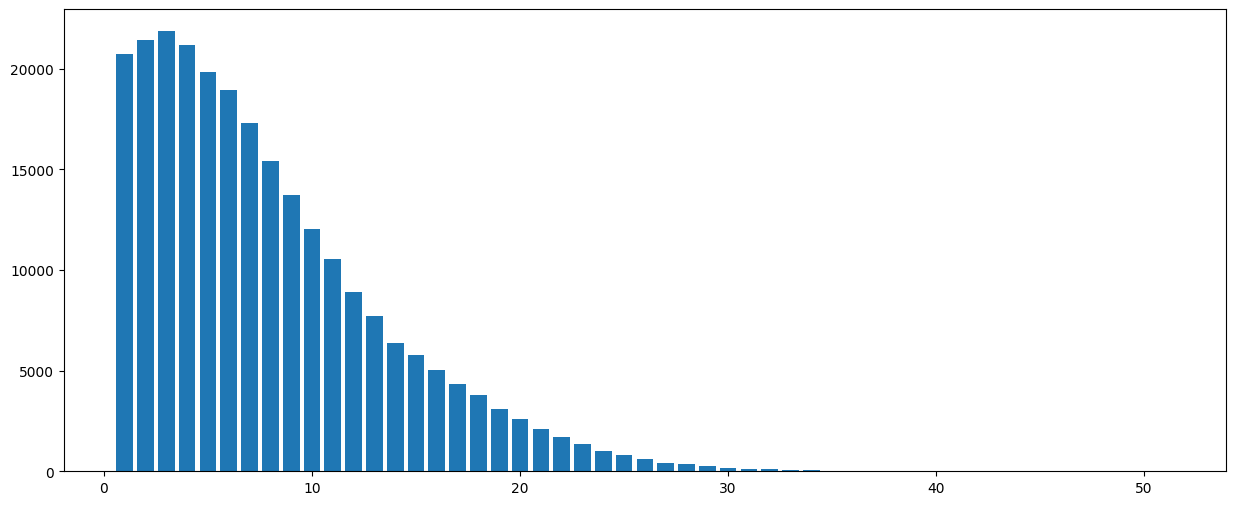

In [21]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=1)
ax.bar(train_len_counter.index.values, train_len_counter.values)

In [22]:
def create_buckets_from_credits(path_to_dataset, bucket_info, save_to_path, frame_with_ids = None,
                                num_parts_to_preprocess_at_once: int = 1,
                                num_parts_total=50, has_target=False):
    print('test_1')
    block = 0
    for step in tqdm.tqdm(range(0, num_parts_total, num_parts_to_preprocess_at_once),
                     desc="Preparing credit data"):
        print('test_2')
        credits_frame = read_parquet_dataset_from_local(path_to_dataset, step, num_parts_to_preprocess_at_once, verbose=True)
        print('test_3')
        credits_frame.loc[:, features] += 1
        print('test_4')
        seq = transform_credits_to_sequences(credits_frame)
        print('test_5')
        print("Transforming credits to sequences is done.")

        if frame_with_ids is not None:
            print('test_6')
            seq = seq.merge(frame_with_ids, on="id")
            print('test_7')
        print('test_8')
        block_as_str = str(block)
        print('test_9')
        if len(block_as_str) == 1:
            print('test_10')
            block_as_str = "00" + block_as_str
            print('test_11')
        else:
            print('test_12')
            block_as_str = "0" + block_as_str
            print('test_13')
        print('test_14')

        processed_fragment =  create_padded_buckets(seq, bucket_info=bucket_info, has_target=has_target, 
                                                    save_to_file_path=os.path.join(save_to_path, 
                                                                                   f"processed_chunk_{block_as_str}.pkl"))
        block += 1

In [61]:
train, val = train_test_split(train_target, random_state=42, test_size=0.1)
train.shape, val.shape

((18748, 2), (2084, 2))

In [62]:
keys_ = list(range(1, 59))
lens_ = list(range(1, 41)) + [45] * 5 + [50] * 5 + [58] * 8
bucket_info = dict(zip(keys_, lens_))
bucket_info

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 45,
 42: 45,
 43: 45,
 44: 45,
 45: 45,
 46: 50,
 47: 50,
 48: 50,
 49: 50,
 50: 50,
 51: 58,
 52: 58,
 53: 58,
 54: 58,
 55: 58,
 56: 58,
 57: 58,
 58: 58}

In [63]:
TRAIN_BUCKETS_PATH = "/trinity/home/team08/workspace/main_project/train_buckets_rnn"
VAL_BUCKETS_PATH = "/trinity/home/team08/workspace/main_project/val_buckets_rnn"
TEST_BUCKETS_PATH = "/trinity/home/team08/workspace/main_project/test_buckets_rnn"


for buckets_path in [TRAIN_BUCKETS_PATH, VAL_BUCKETS_PATH, TEST_BUCKETS_PATH]:
    !rm -rf $buckets_path
    !mkdir $buckets_path


create_buckets_from_credits(TRAIN_DATA_PATH,
                            bucket_info=bucket_info,
                            save_to_path=TRAIN_BUCKETS_PATH,
                            frame_with_ids=train,
                            num_parts_to_preprocess_at_once=4,
                            num_parts_total=12, has_target=True)

dataset_train = sorted([os.path.join(TRAIN_DATA_PATH, x) for x in os.listdir(TRAIN_DATA_PATH)])
dataset_train

test_1


Preparing credit data:   0%|          | 0/3 [00:00<?, ?it/s]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_1.pqt
/trinity/home/team08/workspace/main_project/train_data/part_2.pqt
/trinity/home/team08/workspace/main_project/train_data/part_3.pqt
/trinity/home/team08/workspace/main_project/train_data/part_4.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_6
test_7
test_8
test_9
test_10
test_11
test_14


Extracting buckets:   0%|          | 0/38 [00:00<?, ?it/s]

Preparing credit data:  33%|███▎      | 1/3 [00:12<00:24, 12.04s/it]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_4.pqt
/trinity/home/team08/workspace/main_project/train_data/part_5.pqt
/trinity/home/team08/workspace/main_project/train_data/part_6.pqt
/trinity/home/team08/workspace/main_project/train_data/part_7.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_6
test_7
test_8
test_9
test_10
test_11
test_14


Extracting buckets: 0it [00:00, ?it/s]

Preparing credit data:  67%|██████▋   | 2/3 [00:23<00:11, 11.90s/it]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_8.pqt
/trinity/home/team08/workspace/main_project/train_data/part_9.pqt
/trinity/home/team08/workspace/main_project/train_data/part_10.pqt
/trinity/home/team08/workspace/main_project/train_data/part_11.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_6
test_7
test_8
test_9
test_10
test_11
test_14


Extracting buckets: 0it [00:00, ?it/s]

Preparing credit data: 100%|██████████| 3/3 [00:36<00:00, 12.32s/it]


['/trinity/home/team08/workspace/main_project/train_data/part_1.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_10.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_11.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_12.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_2.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_3.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_4.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_5.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_6.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_7.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_8.pqt',
 '/trinity/home/team08/workspace/main_project/train_data/part_9.pqt']

In [64]:
create_buckets_from_credits(TRAIN_DATA_PATH,
                            bucket_info=bucket_info,
                            save_to_path=VAL_BUCKETS_PATH,
                            frame_with_ids=val,
                            num_parts_to_preprocess_at_once=4, 
                            num_parts_total=12, has_target=True)

dataset_val = sorted([os.path.join(VAL_BUCKETS_PATH, x) for x in os.listdir(VAL_BUCKETS_PATH)])
dataset_val

test_1


Preparing credit data:   0%|          | 0/3 [00:00<?, ?it/s]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_1.pqt
/trinity/home/team08/workspace/main_project/train_data/part_2.pqt
/trinity/home/team08/workspace/main_project/train_data/part_3.pqt
/trinity/home/team08/workspace/main_project/train_data/part_4.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_6
test_7
test_8
test_9
test_10
test_11
test_14


Extracting buckets:   0%|          | 0/33 [00:00<?, ?it/s]

Preparing credit data:  33%|███▎      | 1/3 [00:11<00:23, 11.82s/it]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_4.pqt
/trinity/home/team08/workspace/main_project/train_data/part_5.pqt
/trinity/home/team08/workspace/main_project/train_data/part_6.pqt
/trinity/home/team08/workspace/main_project/train_data/part_7.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_6
test_7
test_8
test_9
test_10
test_11
test_14


Extracting buckets: 0it [00:00, ?it/s]

Preparing credit data:  67%|██████▋   | 2/3 [00:25<00:12, 12.69s/it]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/train_data/part_8.pqt
/trinity/home/team08/workspace/main_project/train_data/part_9.pqt
/trinity/home/team08/workspace/main_project/train_data/part_10.pqt
/trinity/home/team08/workspace/main_project/train_data/part_11.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_6
test_7
test_8
test_9
test_10
test_11
test_14


Extracting buckets: 0it [00:00, ?it/s]

Preparing credit data: 100%|██████████| 3/3 [00:36<00:00, 12.30s/it]


['/trinity/home/team08/workspace/main_project/val_buckets_rnn/processed_chunk_000.pkl',
 '/trinity/home/team08/workspace/main_project/val_buckets_rnn/processed_chunk_001.pkl',
 '/trinity/home/team08/workspace/main_project/val_buckets_rnn/processed_chunk_002.pkl']

In [65]:
create_buckets_from_credits(TEST_DATA_PATH,
                            bucket_info=bucket_info,
                            save_to_path= TEST_BUCKETS_PATH, num_parts_to_preprocess_at_once=2, 
                            num_parts_total=2)

dataset_test = sorted([os.path.join(TEST_BUCKETS_PATH, x) for x in os.listdir(TEST_BUCKETS_PATH)])
dataset_test

test_1


Preparing credit data:   0%|          | 0/1 [00:00<?, ?it/s]

test_2
Reading chunks:
/trinity/home/team08/workspace/main_project/test_data/part_1.pqt
/trinity/home/team08/workspace/main_project/test_data/part_2.pqt


/tmp/ipykernel_3967394/2522210297.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/2 [00:00<?, ?it/s]

test_3
test_4
test_5
Transforming credits to sequences is done.
test_8
test_9
test_10
test_11
test_14


Extracting buckets:   0%|          | 0/43 [00:00<?, ?it/s]

Preparing credit data: 100%|██████████| 1/1 [00:40<00:00, 40.50s/it]


['/trinity/home/team08/workspace/main_project/test_buckets_rnn/processed_chunk_000.pkl']

In [ ]:
dict_result

In [66]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [67]:
###from training_aux import EarlyStopping


import torch
import numpy as np


class EarlyStopping:
    """
    Останавливает обучение модели, если валидационная метрика не улучшается в течение заданного числа эпох.

    Параметры:
    ----------
    patience: int, default=7
        Допустимое число эпох без улучшения валидационной метрики.
        Валидационная метрика должна улучшаться как минимум каждые ``patience`` эпох, иначе обучение останавливается.
    mode: str, default="min"
        Режим работы. Допустимые значения: "min", "max" - минимизация или максимизация целевой метрики соответственно.
    verbose: bool, default=False
        Печатать ли сообщение при каждом улучшении валидационной метрики.
    delta: int, default=0
        Минимальное изменение контролируемой метрики, которое можно считать улучшением.
    save_path: str, default="checkpoint.hdf5"
        Путь до файла, в который необходимо сохранять лучшую модель.
    metric_name: str, default=None
        Имя метрики.
    save_format: str, default="torch"
        Формат модели. Допустимые значения: "torch", "tf" - для моделей на фреймворках pytorch и tensorflow.keras соответственно.
    """

    def __init__(self, patience=7, mode='min', verbose=False, delta=0, save_path='checkpoint.hdf5', metric_name=None, save_format='torch'):
        if mode not in ["min", "max"]:
            raise ValueError(f"Unrecognized mode: {mode}! Please choose one of the following modes: \"min\", \"max\"")

        if save_format not in ["torch", "tf"]:
            raise ValueError(f"Unrecognized format: {save_format}! Please choose one of the following formats: \"torch\", \"tf\"")

        self.patience = patience
        self.mode = mode
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.best_prev_score = np.Inf if mode == "min" else -np.Inf
        self.delta = delta
        self.save_path = save_path
        self.metric_name = "metric" if not metric_name else metric_name
        self.save_format = save_format

    def __call__(self, metric_value, model):

        score = -metric_value if self.mode == "min" else metric_value

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(metric_value, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(
                f"No imporvement in validation {self.metric_name}. Current: {score:.6f}. Current best: {self.best_score:.6f}")
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(metric_value, model)
            self.counter = 0

    def save_checkpoint(self, metric_value: float, model: torch.nn.Module or tensorflow.keras.Model):
        """
        Cохраняет модель, если валидационная метрика улучшилась.

        Параметры:
        ----------
        metric_value: float
            Значение валидационной метрики.
        model: torch.nn.Module or tensorflow.keras.Model
            Обучаемая модель.

        Возвращаемое значение:
        ----------------------
        None
        """
        if self.verbose:
            print(
                f"Validation {self.metric_name} improved ({self.best_prev_score:.6f} --> {metric_value:.6f}).  Saving model...")
        if self.save_format == "tf":
            model.save_weights(self.save_path)
        else:
            torch.save(model.state_dict(), self.save_path)

        self.best_prev_score = metric_value


In [68]:
###from data_generators import batches_generator



from typing import List
import numpy as np
import pickle
import torch


def batches_generator(list_of_paths: List[str], batch_size: int = 32, shuffle: bool = False,
                      is_infinite: bool = False, verbose: bool = False, device: torch.device = None,
                      output_format: str = "torch", is_train: bool = True):
    """
    Создает батчи на вход рекуррентных нейронных сетей, реализованных на фреймворках tensorflow и pytorch.

    Параметры:
    -----------
    list_of_paths: List[str]
        Список путей до файлов с предобработанными последовательностями.
    batch_size: int, default=32
        Размер батча.
    shuffle: bool, default=False
        Перемешивать ли данные перед генерацией батчей.
    is_infinite: bool, default=False
        Должен ли генератор быть бесконечным.
    verbose: bool, default=False
        Печатать ли имя текущего обрабатываемого файла.
    device: torch.device, default=None
        Девайс, на который переместить данные при ``output_format``="torch". Игнорируется, если ``output_format``="tf".
    output_format: str, default="torch"
        Формат возвращаемых данных. Допустимые значения: "torch", "tf".
        Если "torch", то возвращает словарь, с ключами "id_", "features" и "label", если is_train=True,
        и содержащий идентификаторы заявок, признаки и тагрет соответственно.
        Признаки и таргет помещаются на девайс, указанный в ``device``.
        Если "tf", то возращает кортеж (признаки, таргет), если ``is_train``=True, и кортеж (признаки, идентификаторы заявок) иначе.
    is_train: bool, default=True
        Используется ли генератор для обучения модели или для инференса.

    Возвращаемое значение:
    ----------------------
    result: dict or tuple
        Выходной словарь или кортеж в зависимости от параметра ``output_format``.
    """
    if output_format not in ["torch", "tf"]:
        raise ValueError("Unknown format. Please choose one of the following formats: \"torch\", \"tf\"")

    while True:
        if shuffle:
            np.random.shuffle(list_of_paths)

        for path in list_of_paths:
            if verbose:
                print(f"Reading {path}")

            with open(path, "rb") as f:
                data = pickle.load(f)

            ids, padded_sequences, targets = data["id"], data["padded_sequences"], data["target"]
            indices = np.arange(len(ids))
            if shuffle:
                np.random.shuffle(indices)
                ids = ids[indices]
                padded_sequences = padded_sequences[indices]
                if is_train:
                    targets = targets[indices]

            for idx in range(len(ids)):
                bucket_ids = ids[idx]
                bucket = padded_sequences[idx]
                if is_train:
                    bucket_targets = targets[idx]

                for jdx in range(0, len(bucket), batch_size):
                    batch_ids = bucket_ids[jdx: jdx + batch_size]
                    batch_sequences = bucket[jdx: jdx + batch_size]
                    if is_train:
                        batch_targets = bucket_targets[jdx: jdx + batch_size]

                    if output_format == "tf":
                        batch_sequences = [batch_sequences[:, i] for i in range(len(features))]

                        if is_train:
                            yield torch.LongTensor(batch_sequences), batch_targets
                        else:
                            yield torch.LongTensor(batch_sequences), batch_ids
                    else:
                        batch_sequences = [torch.LongTensor(batch_sequences[:, i]).to(device) for i in range(len(features))]
                        if is_train:
                            yield dict(id_=batch_ids,
                                       features=torch.LongTensor(batch_sequences),
                                       label=torch.LongTensor(batch_targets).to(device),
                                       shape=torch.LongTensor(batch_size, batch_size,1))
                        else:
                            yield dict(id_=batch_ids,
                                       features=torch.LongTensor(batch_sequences),
                                      shape=torch.LongTensor(batch_size, batch_size,1))
        if not is_infinite:
            break


In [69]:
###from pytorch_training import train_epoch, eval_model, inference


from typing import List
import torch
import pandas as pd
import torch.nn as nn
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score



def train_epoch(model: torch.nn.Module, optimizer: torch.optim.Optimizer, dataset_train: List[str],
                batch_size: int = 64, shuffle: bool = True, print_loss_every_n_batches: int = 500,
                device: torch.device = None):
    """
    Делает одну эпоху обучения модели, логируя промежуточные значения функции потерь.

    Параметры:
    -----------
    model: torch.nn.Module
        Обучаемая модель.
    optimizer: torch.optim.Optimizer
        Оптимизатор.
    dataset_train: List[str]
        Список путей до файлов с предобработанными последовательностями.
    batch_size: int, default=64
        Размер батча.
    shuffle: bool, default=False
        Перемешивать ли данные перед подачей в модель.
    print_loss_every_n_batches: int, default=500
        Число батчей.
    device: torch.device, default=None
        Девайс, на который переместить данные.

    Возвращаемое значение:
    ----------------------
    None
    """
    model.train()
    loss_function = nn.BCEWithLogitsLoss(reduction="none")
    losses = torch.LongTensor().to(device)
    samples_counter = 0
    train_generator = batches_generator(dataset_train, batch_size=batch_size, shuffle=shuffle,
                                        device=device, is_train=True, output_format="torch")

    for num_batch, batch in tqdm_notebook(enumerate(train_generator, start=1), desc="Training"):
        output = torch.flatten(model(batch["features"]))
        batch_loss = loss_function(output, batch["label"].float())
        batch_loss.mean().backward()
        optimizer.step()
        optimizer.zero_grad()

        samples_counter += batch_loss.size(0)

        losses = torch.cat([losses, batch_loss], dim=0)
        if num_batch % print_loss_every_n_batches == 0:
            print(f"Batches {num_batch - print_loss_every_n_batches + 1} - {num_batch} loss:"
                  f"{losses[-samples_counter:].mean()}", end="\r")
            samples_counter = 0

    print(f"Training loss after epoch: {losses.mean()}", end="\r")


def eval_model(model: torch.nn.Module, dataset_val: List[str], batch_size: int = 32, device: torch.device = None) -> float:
    """
    Скорит выборку моделью и вычисляет метрику ROC AUC.

    Параметры:
    -----------
    model: torch.nn.Module
        Модель, которой необходимо проскорить выборку.
    dataset_val: List[str]
        Список путей до файлов с предобработанными последовательностями.
    batch_size: int, default=32
        Размер батча.
    device: torch.device, default=None
        Девайс, на который переместить данные.

    Возвращаемое значение:
    ----------------------
    auc: float
    """
    model.eval()
    preds = []
    targets = []
    val_generator = batches_generator(dataset_val, batch_size=batch_size, shuffle=False,
                                      device=device, is_train=True, output_format="torch")

    for batch in tqdm_notebook(val_generator, desc="Evaluating model"):
        targets.extend(batch["label"].detach().cpu().numpy().flatten())
        output = model(batch["features"])
        preds.extend(output.detach().cpu().numpy().flatten())

    return roc_auc_score(targets, preds)


def inference(model: torch.nn.Module, dataset_test: List[str], batch_size: int = 32, device: torch.device = None) -> pd.DataFrame:
    """
    Скорит выборку моделью.

    Параметры:
    -----------
    model: torch.nn.Module
        Модель, которой необходимо проскорить выборку.
    dataset_test: List[str]
        Список путей до файлов с предобработанными последовательностями.
    batch_size: int, default=32
        Размер батча.
    device: torch.device, default=None
        Девайс, на который переместить данные.

    Возвращаемое значение:
    ----------------------
    scores: pandas.DataFrame
        Датафрейм с двумя колонками: "id" - идентификатор заявки и "score" - скор модели.
    """
    model.eval()
    preds = []
    ids = []
    test_generator = batches_generator(dataset_test, batch_size=batch_size, shuffle=False,
                                       verbose=False, device=device, is_train=False,
                                       output_format="torch")

    for batch in tqdm_notebook(test_generator, desc="Test predictions"):
        ids.extend(batch["id_"])
        output = model(batch["features"])
        preds.extend(output.detach().cpu().numpy().flatten())

    return pd.DataFrame({
        "id": ids,
        "score": preds
    })


In [70]:
def compute_embed_dim(n_cat: int) -> int:
    return min(600, round(1.6 * n_cat**0.56))

In [71]:
embedding_projections = {feat: (max(uniq)+1, compute_embed_dim(max(uniq)+1)) for feat, uniq in uniques.items()}
embedding_projections

{'pre_since_opened': (20, 9),
 'pre_since_confirmed': (18, 8),
 'pre_pterm': (18, 8),
 'pre_fterm': (17, 8),
 'pre_till_pclose': (17, 8),
 'pre_till_fclose': (16, 8),
 'pre_loans_credit_limit': (20, 9),
 'pre_loans_next_pay_summ': (7, 5),
 'pre_loans_outstanding': (6, 4),
 'pre_loans_total_overdue': (1, 2),
 'pre_loans_max_overdue_sum': (4, 3),
 'pre_loans_credit_cost_rate': (14, 7),
 'pre_loans5': (17, 8),
 'pre_loans530': (20, 9),
 'pre_loans3060': (10, 6),
 'pre_loans6090': (6, 4),
 'pre_loans90': (20, 9),
 'is_zero_loans5': (2, 2),
 'is_zero_loans530': (2, 2),
 'is_zero_loans3060': (2, 2),
 'is_zero_loans6090': (2, 2),
 'is_zero_loans90': (2, 2),
 'pre_util': (20, 9),
 'pre_over2limit': (20, 9),
 'pre_maxover2limit': (20, 9),
 'is_zero_util': (2, 2),
 'is_zero_over2limit': (2, 2),
 'is_zero_maxover2limit': (2, 2),
 'enc_paym_0': (4, 3),
 'enc_paym_1': (4, 3),
 'enc_paym_2': (4, 3),
 'enc_paym_3': (4, 3),
 'enc_paym_4': (4, 3),
 'enc_paym_5': (4, 3),
 'enc_paym_6': (4, 3),
 'enc_pay

In [72]:
class CreditsRNN(nn.Module):
    def __init__(self, features, embedding_projections, rnn_units=128, top_classifier_units=32):
        super(CreditsRNN, self).__init__()
        self._credits_cat_embeddings = nn.ModuleList([self._create_embedding_projection(*embedding_projections[feature]) 
                                                          for feature in features])
                        
        self._gru = nn.GRU(input_size=sum([embedding_projections[x][1] for x in features]),
                             hidden_size=rnn_units, batch_first=True, bidirectional=False)
        self._hidden_size = rnn_units
        self._top_classifier = nn.Linear(in_features=rnn_units, out_features=top_classifier_units)
        self._intermediate_activation = nn.ReLU()
        self._head = nn.Linear(in_features=top_classifier_units, out_features=1)
    
    def forward(self, features):
        batch_size = features[0].shape[0]
        embeddings = [embedding(features[i]) for i, embedding in enumerate(self._credits_cat_embeddings)]
        concated_embeddings = torch.cat(embeddings, dim=-1)
        
        _, last_hidden = self._gru(concated_embeddings)
        last_hidden = torch.reshape(last_hidden.permute(1, 2, 0), shape=(batch_size, self._hidden_size))
                                
        classification_hidden = self._top_classifier(last_hidden)
        activation = self._intermediate_activation(classification_hidden)
        raw_output = self._head(activation)
        return raw_output
    
    @classmethod
    def _create_embedding_projection(cls, cardinality, embed_size, add_missing=True, padding_idx=0):
        add_missing = 1 if add_missing else 0
        return nn.Embedding(num_embeddings=cardinality+add_missing, embedding_dim=embed_size, padding_idx=padding_idx)

In [73]:
path_to_checkpoints = "/trinity/home/team08/workspace/main_project/checkpoints/"
es = EarlyStopping(patience=3, mode="max", verbose=True, save_path=os.path.join(path_to_checkpoints, "best_checkpoint.pt"), 
                   metric_name="ROC-AUC", save_format="torch")

In [74]:
num_epochs = 10
train_batch_size = 128
val_batch_size = 128

In [75]:
model = CreditsRNN(features, embedding_projections).to(device)

In [76]:
optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters())

In [77]:
model

CreditsRNN(
  (_credits_cat_embeddings): ModuleList(
    (0): Embedding(21, 9, padding_idx=0)
    (1-2): 2 x Embedding(19, 8, padding_idx=0)
    (3-4): 2 x Embedding(18, 8, padding_idx=0)
    (5): Embedding(17, 8, padding_idx=0)
    (6): Embedding(21, 9, padding_idx=0)
    (7): Embedding(8, 5, padding_idx=0)
    (8): Embedding(7, 4, padding_idx=0)
    (9): Embedding(2, 2, padding_idx=0)
    (10): Embedding(5, 3, padding_idx=0)
    (11): Embedding(15, 7, padding_idx=0)
    (12): Embedding(18, 8, padding_idx=0)
    (13): Embedding(21, 9, padding_idx=0)
    (14): Embedding(11, 6, padding_idx=0)
    (15): Embedding(7, 4, padding_idx=0)
    (16): Embedding(21, 9, padding_idx=0)
    (17-21): 5 x Embedding(3, 2, padding_idx=0)
    (22-24): 3 x Embedding(21, 9, padding_idx=0)
    (25-27): 3 x Embedding(3, 2, padding_idx=0)
    (28-38): 11 x Embedding(5, 3, padding_idx=0)
    (39): Embedding(6, 4, padding_idx=0)
    (40-47): 8 x Embedding(5, 3, padding_idx=0)
    (48): Embedding(6, 4, padding_i

In [78]:
%%time
for epoch in range(num_epochs):
    print(f"Starting epoch {epoch+1}")
    train_epoch(model, optimizer, dataset_train, batch_size=train_batch_size, 
                shuffle=True, print_loss_every_n_batches=500, device=device)
    
    val_roc_auc = eval_model(model, dataset_val, batch_size=val_batch_size, device=device)
    es(val_roc_auc, model)
    
    if es.early_stop:
        print("Early stopping reached. Stop training...")
        break
    torch.save(model.state_dict(), os.path.join(path_to_checkpoints, f"epoch_{epoch+1}_val_{val_roc_auc:.3f}.pt"))
    
    train_roc_auc = eval_model(model, dataset_train, batch_size=val_batch_size, device=device)
    print(f"Epoch {epoch+1} completed. Train ROC AUC: {train_roc_auc}, val ROC AUC: {val_roc_auc}")

Starting epoch 1


/tmp/ipykernel_3967394/1341478050.py:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for num_batch, batch in tqdm_notebook(enumerate(train_generator, start=1), desc="Training"):


Training: 0it [00:00, ?it/s]

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.